In [22]:
from google.colab import drive
drive.mount('/content/drive')

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os

base_path = '/content/drive/My Drive/Patronus/mimic_masks'

# Listar archivos y directorios en mimic_masks
if os.path.exists(base_path):
    print("Contenido de mimic_masks:")
    print(os.listdir(base_path))
else:
    print(f"{base_path} no existe")


Contenido de mimic_masks:
['heart', 'lungs']


In [11]:
# Paths to the dataset
lung_path = '/content/drive/My Drive/Patronus/mimic_masks/lungs'
heart_path = '/content/drive/My Drive/Patronus/mimic_masks/heart'

In [13]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale')
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = tf.image.resize(img, (128, 128))  # Adjust the size as needed
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Define the paths
lung_path = '/content/drive/My Drive/Patronus/mimic_masks/lungs'
heart_path = '/content/drive/My Drive/Patronus/mimic_masks/heart'

# Verify and load images
if os.path.exists(lung_path) and os.path.exists(heart_path):
    lung_images, lung_labels = load_images_from_folder(lung_path, 0)
    heart_images, heart_labels = load_images_from_folder(heart_path, 1)

    # Combine and split the data
    images = np.concatenate((lung_images, heart_images), axis=0)
    labels = np.concatenate((lung_labels, heart_labels), axis=0)

    # Normalize images
    images = images / 255.0

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
else:
    print("Verifica que las rutas a las carpetas 'lungs' y 'heart' sean correctas y que las carpetas existan en Google Drive.")


In [12]:
# Load and prepare the dataset
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), color_mode='grayscale')
        if img is not None:
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = tf.image.resize(img, (128, 128))  # Adjust the size as needed
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

lung_images, lung_labels = load_images_from_folder(lung_path, 0)
heart_images, heart_labels = load_images_from_folder(heart_path, 1)

# Combine and split the data
images = np.concatenate((lung_images, heart_images), axis=0)
labels = np.concatenate((lung_labels, heart_labels), axis=0)

# Normalize images
images = images / 255.0

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


NameError: name 'tf' is not defined

In [14]:
# Create the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(128, 128, 1)))  # Adjust input shape as per resized images
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
# Split the training data for validation
x_val = x_train[:40]
partial_x_train = x_train[40:]

y_val = y_train[:40]
partial_y_train = y_train[40:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=10,
                    validation_data=(x_val, y_val))


Epoch 1/20
28/28 [==============================] - 1s 14ms/step - loss: 0.0506 - accuracy: 0.9750 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 2.9036e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 0s 4ms/step - loss: 8.4227e-05 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 0s 4ms/step - loss: 3.3032e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 0s 5ms/step - loss: 1.6393e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 0s 5ms/step - loss: 9.9728e-06 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000

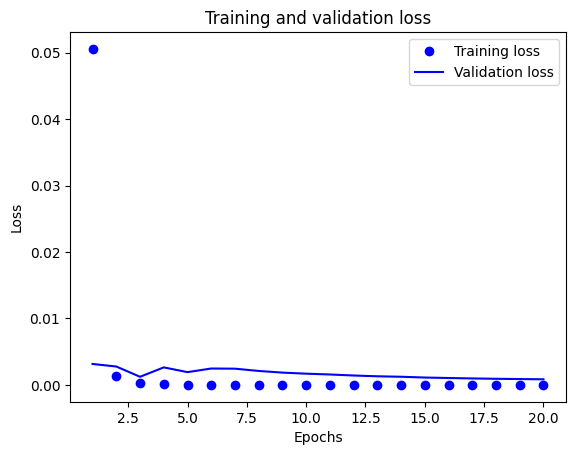

In [16]:
# Plotting training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
results = model.evaluate(x_test, y_test)
print(f'Test accuracy: {results[1]}')

3/3 [==============================] - 0s 5ms/step - loss: 4.1830e-04 - accuracy: 1.0000
Test accuracy: 1.0


Epoch 1/20
28/28 [==============================] - 1s 9ms/step - loss: 0.3642 - accuracy: 0.9357 - val_loss: 0.3659 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 1.0000 - val_loss: 0.3504 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 1.0000 - val_loss: 0.3345 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 1.0000 - val_loss: 0.3186 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 1.0000 - val_loss: 0.3027 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 0s 4ms/step - loss: 0.2716 - accuracy: 1.0000 - val_loss: 0.2863 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 0s 4ms/step - loss: 0.2566 - accuracy: 1.0000 - val_loss: 0.2698 - val_accuracy: 1.0000
Epoch 8/20
28/28 [==

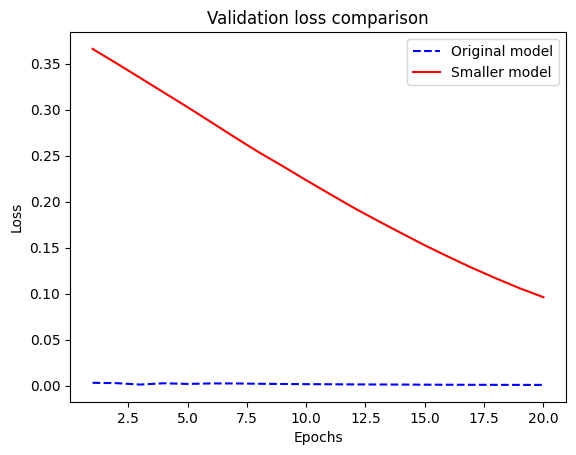

In [18]:
# Smaller model
smaller_model = models.Sequential()
smaller_model.add(layers.Flatten(input_shape=(128, 128, 1)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

smaller_history = smaller_model.fit(partial_x_train,
                                    partial_y_train,
                                    epochs=20,
                                    batch_size=10,
                                    validation_data=(x_val, y_val))

# Plotting validation loss for both models
smaller_val_loss = smaller_history.history['val_loss']

plt.plot(epochs, val_loss_values, 'b--', label='Original model')
plt.plot(epochs, smaller_val_loss, 'r-', label='Smaller model')
plt.title('Validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
28/28 [==============================] - 1s 11ms/step - loss: 0.4102 - accuracy: 0.9286 - val_loss: 0.4053 - val_accuracy: 0.9750
Epoch 2/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3614 - accuracy: 1.0000 - val_loss: 0.3764 - val_accuracy: 0.9750
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3312 - accuracy: 1.0000 - val_loss: 0.3424 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.9964 - val_loss: 0.3121 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 1.0000 - val_loss: 0.2819 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 0s 5ms/step - loss: 0.2435 - accuracy: 1.0000 - val_loss: 0.2474 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 0s 5ms/step - loss: 0.2158 - accuracy: 1.0000 - val_loss: 0.2182 - val_accuracy: 1.0000
Epoch 8/20
28/28 [=

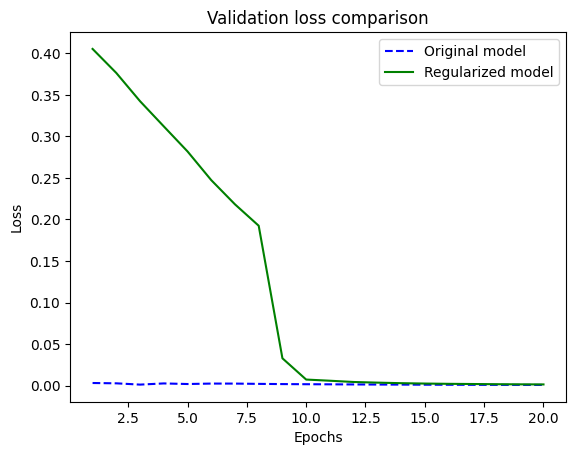

In [19]:
# Regularized model
regularized_model = models.Sequential()
regularized_model.add(layers.Flatten(input_shape=(128, 128, 1)))
regularized_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
regularized_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
regularized_model.add(layers.Dense(1, activation='sigmoid'))

regularized_model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

regularized_history = regularized_model.fit(partial_x_train,
                                            partial_y_train,
                                            epochs=20,
                                            batch_size=10,
                                            validation_data=(x_val, y_val))

# Plotting validation loss for regularized model
regularized_val_loss = regularized_history.history['val_loss']

plt.plot(epochs, val_loss_values, 'b--', label='Original model')
plt.plot(epochs, regularized_val_loss, 'g-', label='Regularized model')
plt.title('Validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
28/28 [==============================] - 1s 11ms/step - loss: 0.7937 - accuracy: 0.7893 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 2/20
28/28 [==============================] - 0s 4ms/step - loss: 0.4238 - accuracy: 0.7821 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.7929 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 4/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.8071 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.7964 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 6/20
28/28 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.8536 - val_loss: 4.7082e-04 - val_accuracy: 1.0000
Epoch 7/20
28/28 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.8143 - val_loss: 3.7525e-04 - val_accuracy: 1.0000
Epoch 8/20


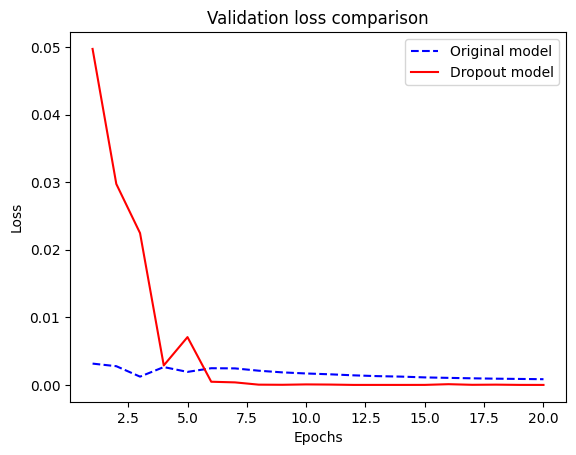

In [20]:
# Model with Dropout
dropout_model = models.Sequential()
dropout_model.add(layers.Flatten(input_shape=(128, 128, 1)))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

dropout_history = dropout_model.fit(partial_x_train,
                                    partial_y_train,
                                    epochs=20,
                                    batch_size=10,
                                    validation_data=(x_val, y_val))

# Plotting validation loss for dropout model
dropout_val_loss = dropout_history.history['val_loss']

plt.plot(epochs, val_loss_values, 'b--', label='Original model')
plt.plot(epochs, dropout_val_loss, 'r-', label='Dropout model')
plt.title('Validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Predictions
predictions = model.predict(x_test)
print(predictions[10])

3/3 [==============================] - 0s 4ms/step
[1.4374808e-15]
